In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans

In [88]:
def get_data():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        #u = pickle._Unpickler(fd)
        #u.encoding = 'latin1'
        train_set, valid_set, test_set = pickle.load(fd)
        #u.load()
        return train_set, valid_set, test_set

In [89]:
train_set, valid_set, test_set = get_data()

In [90]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [91]:
print("Size of training set:", len(train_set[0]))

('Size of training set:', 60000)


In [92]:
print("Size of each training set item (28x28 image 1-d array): ", len(train_set[0][0]))

('Size of each training set item (28x28 image 1-d array): ', 784)


In [93]:
#Reshaping each 784 1-d array into 28x28 2-d array
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [94]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patch = image[i:i+10,j:j+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [95]:
def plot_image(test): 
    fig = plt.figure(figsize=(4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                            test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                            test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                            test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='Greys_r')

    plt.show()

In [96]:
#this function is simply here to make sure that our grid creation works correctly
def test_image():
    #fetch one image
    image = train_set[0][1].reshape(28,28)
    
    print("Image shape: ",image.shape)
    
    #create 16 - 10x10 patches
    test = patch_creation(image)
    
    print("Num patches: ", len(test))
    
    #plotting the test image to see create patches
    plot_image(test)
    
    #plt.imshow(image.reshape(28, 28), cmap='Greys_r')
    

('Image shape: ', (28, 28))
('Num patches: ', 16)


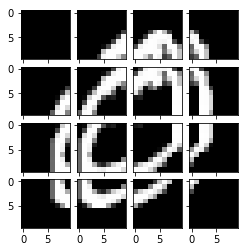

In [97]:
test_image()

In [98]:
#reshaping each 784 1-d array into 28x28 2-d array and creating patches for each image
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [99]:
print("Amount of training images: ", len(training_patches))

('Amount of training images: ', 60000)


In [100]:
print("Amount of matrices (patches) in each training image: ", len(training_patches[0]))

('Amount of matrices (patches) in each training image: ', 16)


In [101]:
#Choosing 1 patch from the 16 previously created for each image at random and appending to 
#training list
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 15)
    train_cluster.append(training_patches[i][n])

In [102]:
#creates a list of 6000 numbers where each is between 0 - 59999
indices = random.sample(range(60000), 6000)

In [103]:
train_cluster[0].shape

(1, 100)

In [104]:
#appending randomly sampled patches using the previously created list of indices
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [105]:
print("Length of our randomly sampled patches: ", len(train_cluster_sample))

('Length of our randomly sampled patches: ', 6000)


In [106]:
train_cluster_sample[0][0]

array([0.046875  , 0.44921875, 0.94140625, 0.9453125 , 0.94140625,
       0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.859375  ,
       0.70703125, 0.98828125, 0.98828125, 0.9921875 , 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.6796875 , 0.97265625,
       0.98828125, 0.72265625, 0.26171875, 0.15234375, 0.23828125,
       0.98828125, 0.8359375 , 0.453125  , 0.        , 0.94140625,
       0.55859375, 0.03515625, 0.        , 0.        , 0.        ,
       0.80078125, 0.109375  , 0.        , 0.        , 0.51953125,
       0.02734375, 0.        , 0.        , 0.        , 0.        ,
       0.11328125, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [107]:
#creating a 6000x100 matrix of zeros that where each row will be one of our samples
training_matrix = np.zeros((6000,100))
for i in range(6000):
    #making eacch row a random patch
    training_matrix[i,:] = train_cluster_sample[i][0]

In [108]:
training_matrix[1,:]

array([0.453125  , 0.94140625, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.98828125, 0.9609375 , 0.95703125, 0.69921875,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125,
       0.98828125, 0.79296875, 0.0859375 , 0.        , 0.        ,
       0.98828125, 0.98828125, 0.96875   , 0.77734375, 0.609375  ,
       0.17578125, 0.09765625, 0.        , 0.        , 0.        ,
       0.38671875, 0.38671875, 0.3515625 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [109]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.predict(training_matrix)

[[0.08989726 0.09267979 0.07609161 ... 0.11766909 0.1291738  0.16738014]
 [0.05353694 0.01335524 0.00625125 ... 0.0060851  0.0102108  0.04779983]
 [0.05055315 0.03455748 0.00952327 ... 0.01388572 0.01248859 0.01220347]
 ...
 [0.04447643 0.06572094 0.13856908 ... 0.80317982 0.77110746 0.73910362]
 [0.58884943 0.60326705 0.62258523 ... 0.64240057 0.26171875 0.0821733 ]
 [0.01302083 0.01795297 0.01108744 ... 0.53436711 0.68513258 0.58818655]]


In [110]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [111]:
y_km_60k = kmeans.predict(training_matrix_60k)

In [112]:
np.unique(y_km_60k)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [113]:
#cluster_dict=[]
cluster_dict = {}
for i in range(50):
    key = str(i)
    subtrain_matrix = training_matrix_60k[y_km_60k==i,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    cluster_dict[key] = kmeans_sub 
    y_km_sub = kmeans_sub.predict(subtrain_matrix)
    #cluster_dict.append(y_km_sub)

In [114]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [115]:
def patch_b(image):
    patches16 = []
    x_ = [0, 1, 2]
    y_ = [0, 1, 2]
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patches9 = []
            for k in x_:
                for l in y_:
                    patch = image[i+k:i+k+10, j+l:j+l+10].reshape(-1,100)
                    patches9.append(patch)
            patches16.append(patches9)
    return patches16

In [116]:
testing_patches = []
for i in range(10000):
    testing_reshaped = test_set[0][i].reshape(28,28)
    testing_padded = np.pad(testing_reshaped, 1, pad_with)
    testing_patched = patch_b(testing_padded)
    testing_patches.append(testing_patched)

In [117]:
print("Shape of padded image: ", testing_padded.shape)
print("Number of original patches: ", len(testing_patched))
print("Number of recentered patches per original patch: ", len(testing_patched[0]))
print("Total number of patches for each image: ", len(testing_patched) * len(testing_patched[0]))

('Shape of padded image: ', (30, 30))
('Number of original patches: ', 16)
('Number of recentered patches per original patch: ', 9)
('Total number of patches for each image: ', 144)


In [118]:
testing_patches[0][0][0].shape

(1, 100)

In [119]:
testing_matrix_1440k = np.zeros((1440000,100))
z=0
for i in range(10000):
    for j in range(16):
        for k in range(9):
            testing_matrix_1440k[z,:] = testing_patches[i][j][k]
            z=z+1

In [120]:
test_km_1440k = kmeans.predict(testing_matrix_1440k)

In [121]:
test_50clusters= np.zeros((10000,16,9))

In [122]:
z=0
for i in range(10000):
    for j in range(16):
        for k in range(9):
            test_50clusters[i,j,k] = test_km_1440k[z]
            z=z+1

In [124]:
test_50clusters[1,2,:]

array([28., 28.,  2., 28., 28.,  2.,  5., 20., 32.])

In [129]:
test_2500clusters= [[['000_000' for i in range(9)] for j in range(16)] for k in range(10000)]


In [130]:
subcluster_test_fit = np.zeros((1,100))
z=1
for i in range(10000):
    for j in range(16):
        for k in range(9):
            cluster = test_50clusters[i,j,k]
            subcluster_test_fit[0,:] = testing_patches[i][j][k]
            fitted_centre=cluster_dict[str(int(cluster))].predict(subcluster_test_fit)
            text=str(int(cluster))+'_'+str(fitted_centre[0])
            test_2500clusters[i][j][k]= text
            if z%1440==0 and z>=1440:
                print(str(z/14400)+'% done')
            z=z+1

0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
0% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
1% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
2% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
3% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
4% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
5% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
6% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
7% done
8% done
8% done
8% done
8% done
8% done
8% done
8% done
8% done
8% done
8% done


64% done
64% done
64% done
64% done
64% done
64% done
64% done
64% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
65% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
66% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
67% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
68% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
69% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
70% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
71% done
72% done
72% done
7

In [131]:
test_2500clusters

[[['19_27', '19_7', '19_4', '19_18', '19_18', '6_18', '7_8', '14_28', '17_30'],
  ['6_5', '43_9', '24_20', '6_48', '43_21', '6_0', '35_42', '23_5', '43_20'],
  ['19_11', '1_14', '1_14', '6_45', '6_45', '43_1', '6_19', '43_2', '43_2'],
  ['1_4', '1_32', '1_32', '24_45', '24_10', '24_46', '2_12', '24_32', '24_26'],
  ['30_22',
   '30_30',
   '31_9',
   '15_33',
   '15_33',
   '31_49',
   '15_43',
   '15_16',
   '15_49'],
  ['41_41', '41_5', '41_45', '8_5', '8_5', '8_5', '8_4', '8_4', '8_4'],
  ['4_34', '4_45', '4_0', '39_37', '48_1', '5_24', '48_4', '48_4', '26_44'],
  ['11_1',
   '11_17',
   '12_19',
   '11_36',
   '11_32',
   '12_19',
   '3_5',
   '3_32',
   '12_30'],
  ['1_1', '1_1', '1_1', '1_1', '1_1', '1_1', '1_1', '1_1', '1_1'],
  ['19_3', '19_19', '14_3', '19_0', '14_40', '14_22', '19_9', '14_32', '17_3'],
  ['0_12', '9_31', '9_29', '9_31', '9_9', '16_27', '9_5', '9_29', '16_48'],
  ['21_31',
   '46_47',
   '46_6',
   '12_49',
   '46_12',
   '46_16',
   '46_47',
   '46_6',
   '1_